Import data and print shape

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import dabl
from math import ceil

%matplotlib inline

plt.style.use('classic')
data = pd.read_csv("StudentsPerformance.csv")
data.shape

(1000, 8)

Print first 5 rows of data

In [165]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


For each object print number of unique values

In [166]:
data.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

Calculate missing data


In [167]:
data.isnull().sum()/data.shape[0]

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

Calculate descriptive statistics for valid objects

In [168]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Comparision of all other attributes w.r.t math score

Target looks like regression


[<AxesSubplot: title={'center': 'Target distribution'}, xlabel='math score', ylabel='frequency'>,
 array([[<AxesSubplot: title={'center': 'F=8.04E-01'}, xlabel='reading score', ylabel='math score'>,
         <AxesSubplot: title={'center': 'F=7.78E-01'}, xlabel='writing score'>]],
       dtype=object),
 array([[<AxesSubplot: title={'center': 'F=3.86E-02'}, xlabel='math score', ylabel='gender'>,
         <AxesSubplot: title={'center': 'F=3.23E-02'}, xlabel='math score', ylabel='race/ethnicity'>,
         <AxesSubplot: title={'center': 'F=1.65E-02'}, xlabel='math score', ylabel='parental level of education'>,
         <AxesSubplot: title={'center': 'F=9.65E-03'}, xlabel='math score', ylabel='lunch'>,
         <AxesSubplot: title={'center': 'F=0.00E+00'}, xlabel='math score', ylabel='test preparation course'>]],
       dtype=object)]

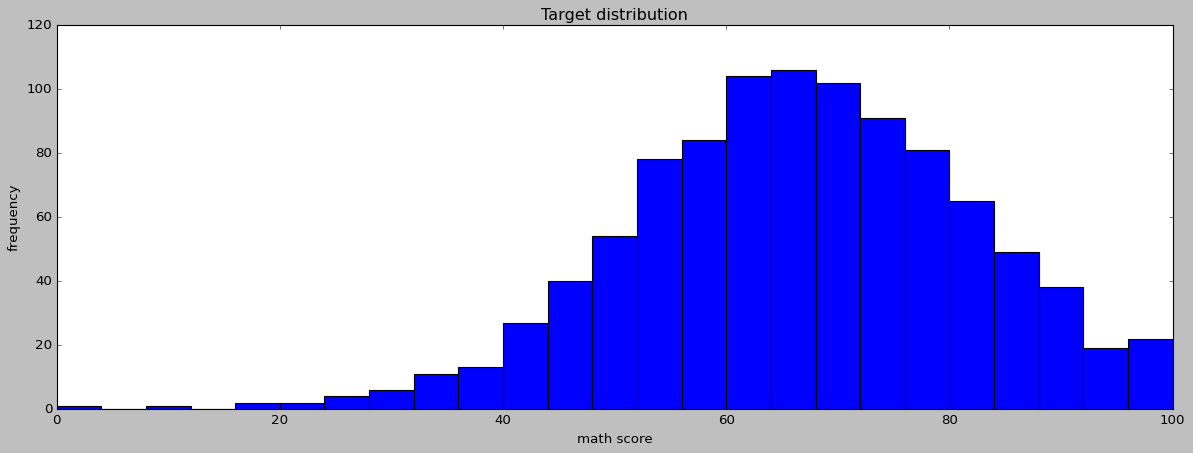

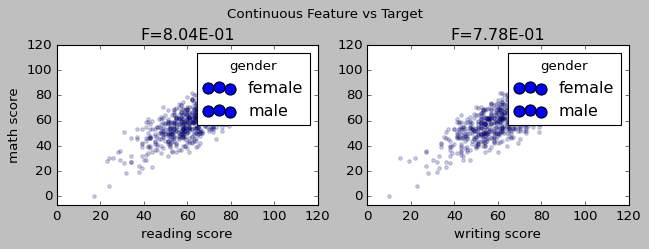

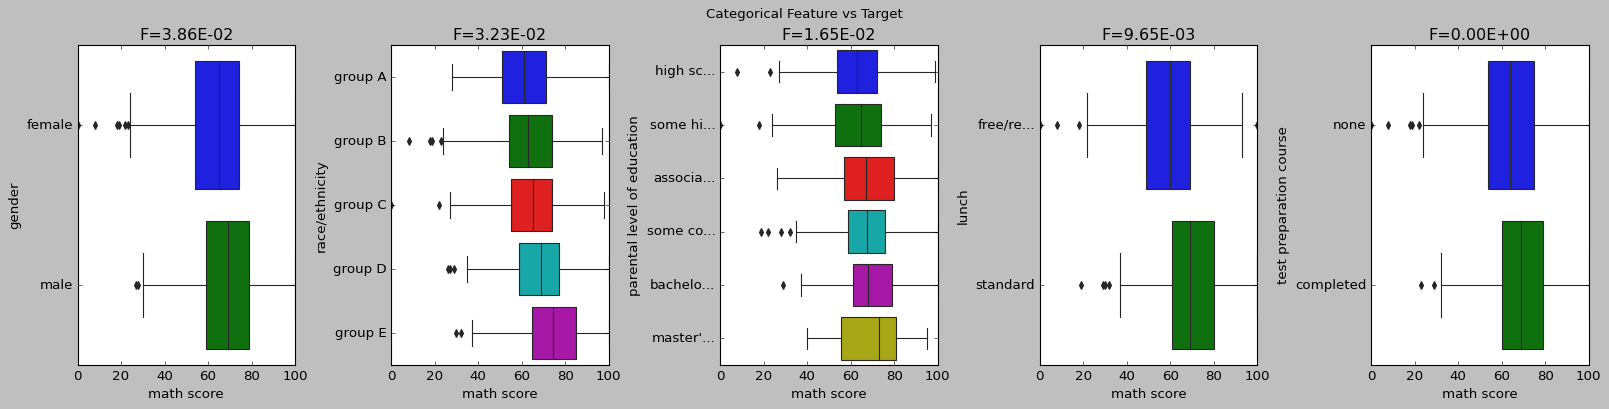

In [169]:
plt.rcParams['figure.figsize'] = (18, 6)
dabl.plot(data, target_col = 'math score')

Comparison of all other attributes w.r.t reading score

Target looks like regression


[<AxesSubplot: title={'center': 'Target distribution'}, xlabel='reading score', ylabel='frequency'>,
 array([[<AxesSubplot: title={'center': 'F=9.49E-01'}, xlabel='writing score', ylabel='reading score'>,
         <AxesSubplot: title={'center': 'F=8.04E-01'}, xlabel='math score'>]],
       dtype=object),
 array([[<AxesSubplot: title={'center': 'F=3.57E-02'}, xlabel='reading score', ylabel='gender'>,
         <AxesSubplot: title={'center': 'F=3.40E-02'}, xlabel='reading score', ylabel='race/ethnicity'>,
         <AxesSubplot: title={'center': 'F=2.97E-02'}, xlabel='reading score', ylabel='parental level of education'>,
         <AxesSubplot: title={'center': 'F=1.80E-02'}, xlabel='reading score', ylabel='lunch'>,
         <AxesSubplot: title={'center': 'F=1.56E-02'}, xlabel='reading score', ylabel='test preparation course'>]],
       dtype=object)]

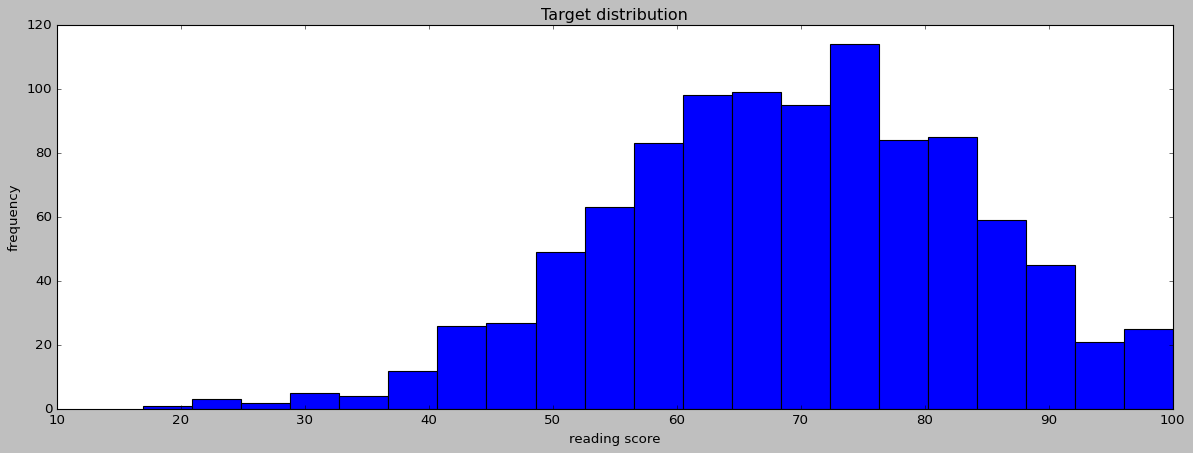

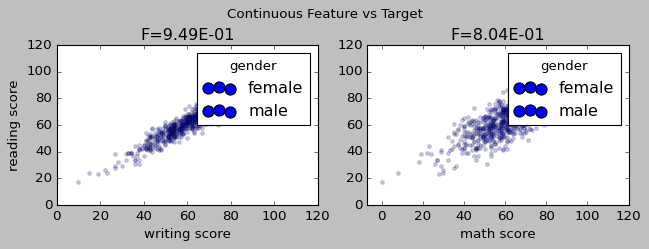

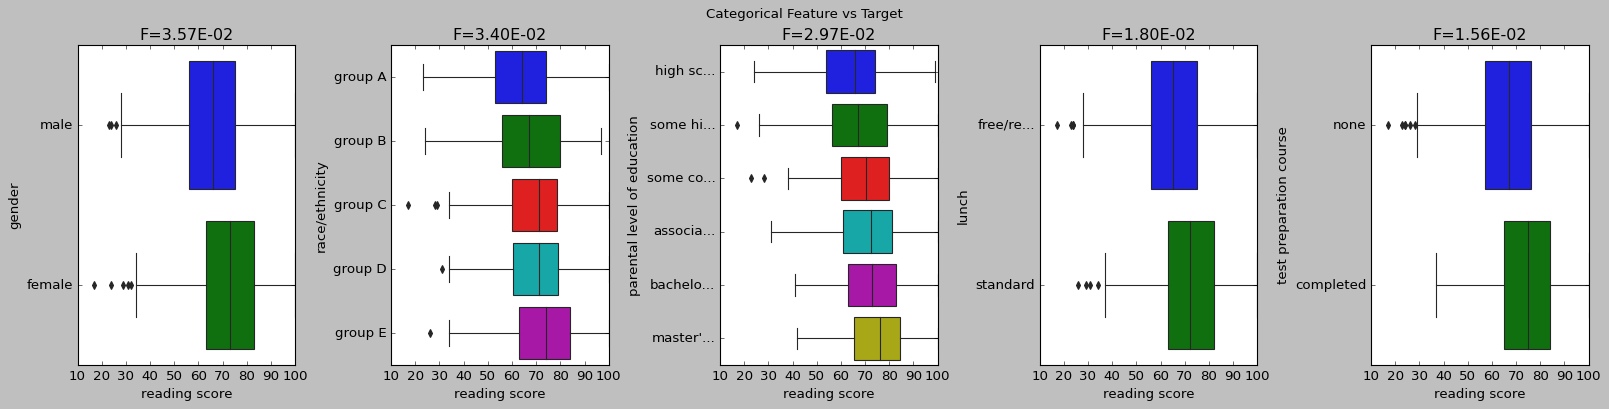

In [170]:
plt.rcParams['figure.figsize'] = (18, 6)
dabl.plot(data, target_col = 'reading score')

Check effect of lunch on student's performance

In [171]:
data[['lunch','gender','math score','writing score',
      'reading score']].groupby(['lunch','gender']).agg('mean')

math score  writing score  reading score
lunch        gender                                          
free/reduced female   55.814815      66.444444      67.386243
             male     62.457831      59.126506      61.542169
standard     female   68.124620      75.927052      75.607903
             male     72.022152      65.509494      67.537975

In [172]:
data[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course','gender']).agg('mean')

math score  writing score  reading score
test preparation course gender                                          
completed               female   67.195652      78.793478      77.375000
                        male     72.339080      69.793103      70.212644
none                    female   61.670659      68.982036      69.982036
                        male     66.688312      59.649351      62.795455

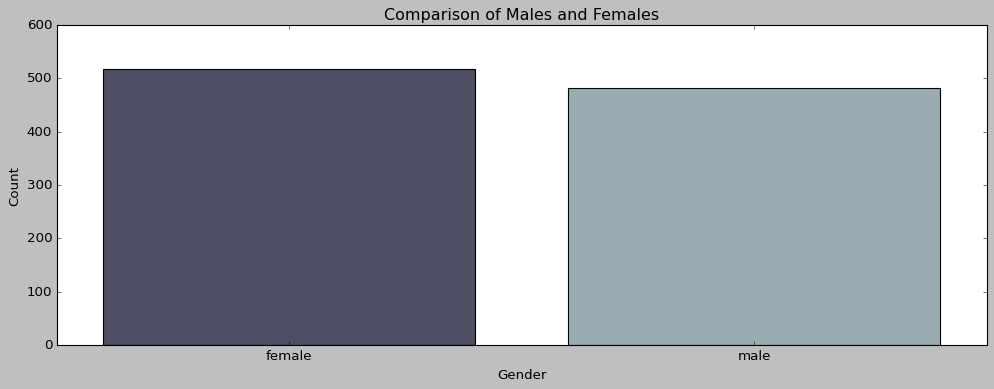

In [173]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.countplot(x = data['gender'], palette='bone')
plt.title('Comparison of Males and Females', fontweight = 30)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

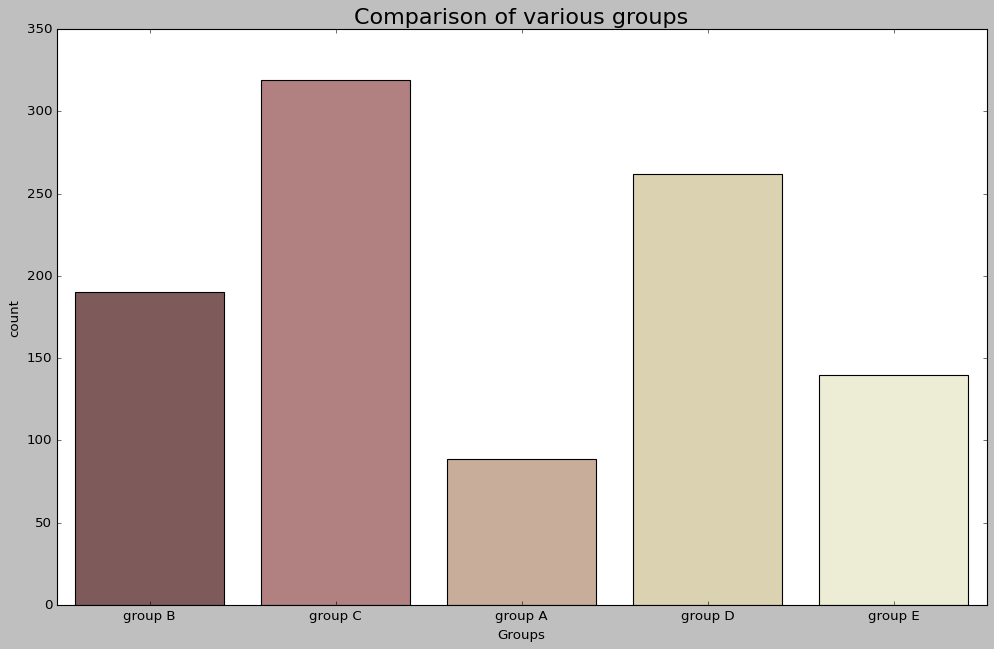

In [174]:
plt.rcParams['figure.figsize'] = (15, 9)

sns.countplot(x = data['race/ethnicity'], palette = 'pink')
plt.title('Comparison of various groups', fontweight = 30, fontsize = 20)
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()

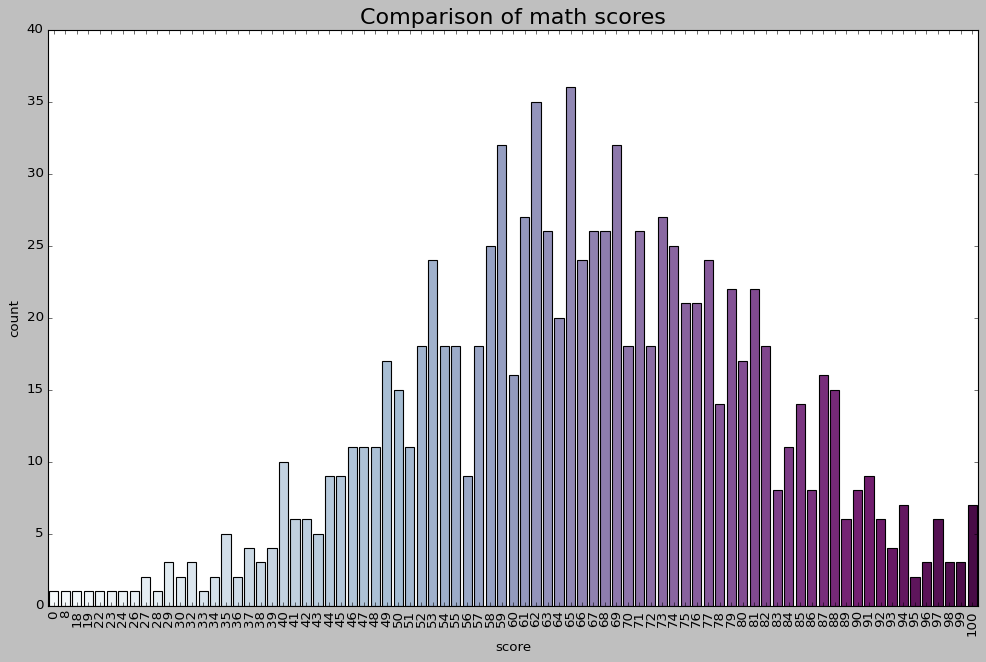

In [175]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(x = data['math score'], palette = 'BuPu')
plt.title('Comparison of math scores', fontweight = 30, fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

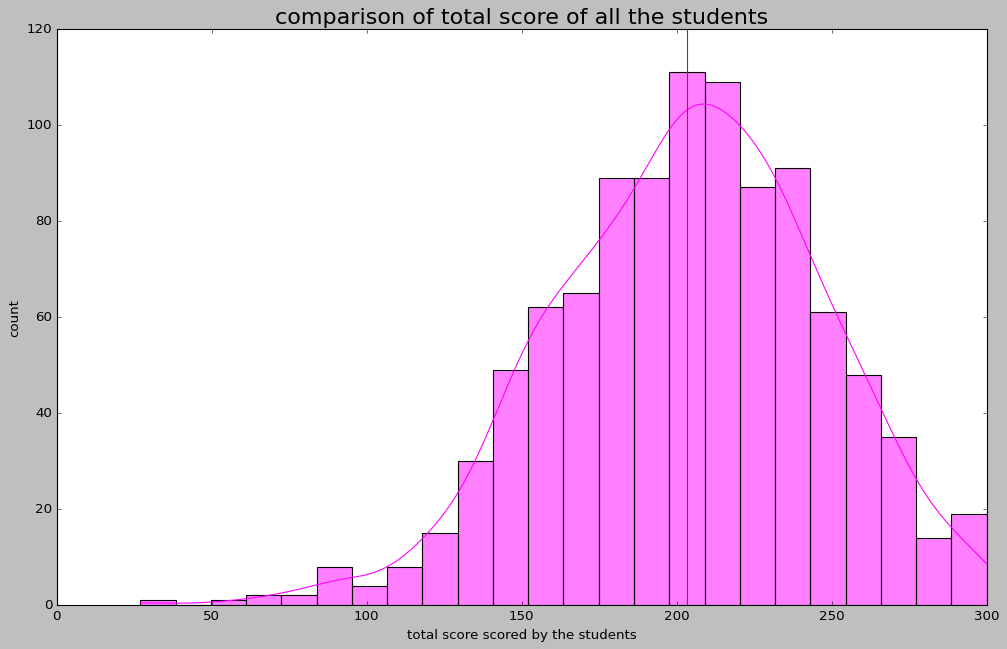

In [176]:
data["total_score"] = data["math score"] + data["reading score"] + data["writing score"]
sns.histplot(x=data["total_score"], color="magenta", kde=True)
plt.axvline(x=data["total_score"].mean(), color='red')
plt.title("comparison of total score of all the students", fontweight=30, fontsize=20)
plt.xlabel("total score scored by the students")
plt.ylabel("count")
plt.show()


C:\Users\kusha\AppData\Local\Temp\ipykernel_13664\4116564465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['percentage'][i] = np.ceil(data['percentage'][i])


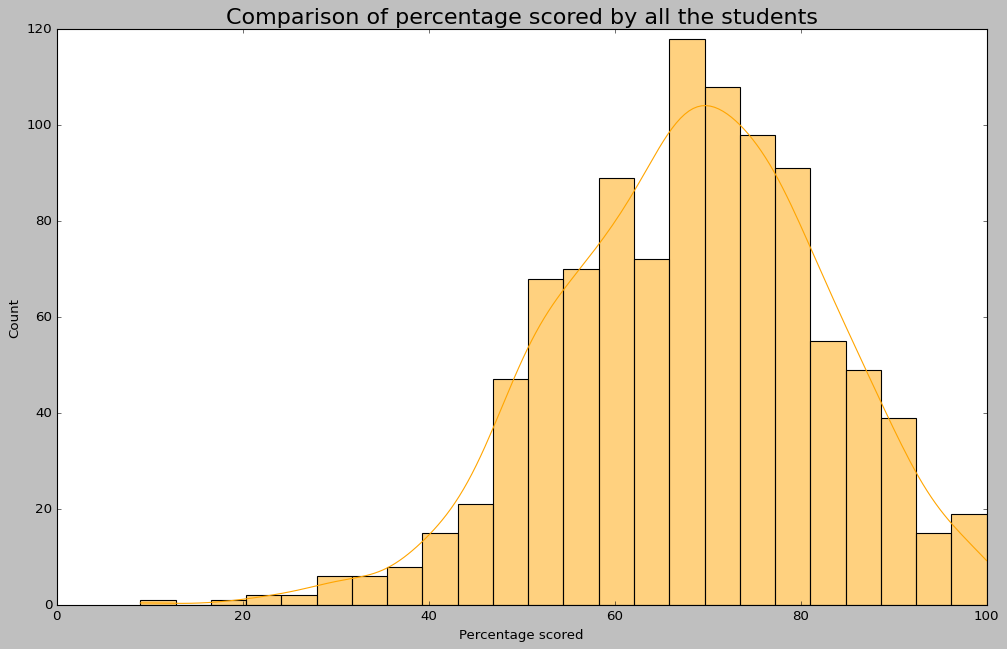

In [177]:
data['percentage'] = data['total_score']/3

for i in range(0, 1000):
    data['percentage'][i] = np.ceil(data['percentage'][i])

plt.rcParams['figure.figsize'] = (15, 9)
sns.histplot(data['percentage'], color = 'orange', kde=True)

plt.title('Comparison of percentage scored by all the students', fontweight = 30, fontsize = 20)
plt.xlabel('Percentage scored')
plt.ylabel('Count')
plt.show()


In [178]:
def getgrade(percentage):
  if(percentage >= 90):
    return 'O'
  if(percentage >= 80):
    return 'A'
  if(percentage >= 70):
    return 'B'
  if(percentage >= 60):
    return 'C'
  if(percentage >= 40):
    return 'D'
  else :
    return 'E'

data['grades'] = data.apply(lambda x: getgrade(x['percentage']), axis = 1 )
data['grades'].value_counts()

B    260
C    252
D    248
A    156
O     58
E     26
Name: grades, dtype: int64

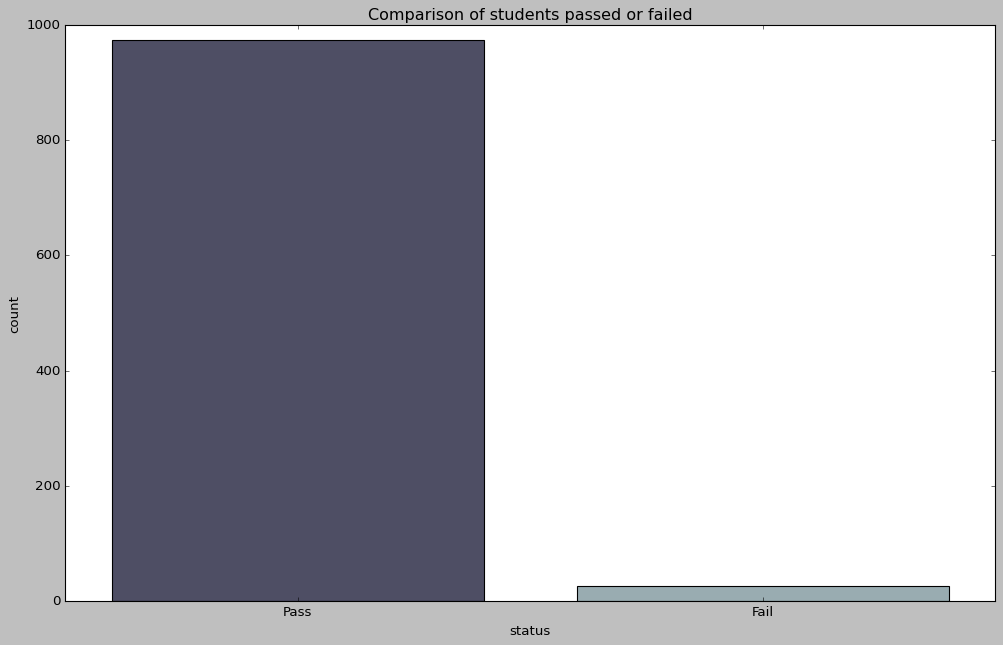

In [179]:
data['status'] = np.where(data['grades'] == 'E', 'Fail', 'Pass')
sns.countplot(x=data['status'], palette='bone')
plt.title("Comparison of students passed or failed")
plt.xlabel('status')
plt.ylabel('count')
plt.show()

In [180]:
data['math grade'] = data.apply(lambda x: getgrade(x['math score']), axis = 1 )
data['math status'] = np.where(data['math grade'] == 'E', 'Fail', 'Pass')
data['reading grade'] = data.apply(lambda x: getgrade(x['reading score']), axis = 1 )
data['reading status'] = np.where(data['reading grade'] == 'E', 'Fail', 'Pass')
data['writing grade'] = data.apply(lambda x: getgrade(x['writing score']), axis = 1 )
data['writing status'] = np.where(data['writing grade'] == 'E', 'Fail', 'Pass')

In [181]:
from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()

# label encoding for test preparation course
data['test preparation course'] = le.fit_transform(data['test preparation course'])

# label encoding for lunch
data['lunch'] = le.fit_transform(data['lunch'])

# label encoding for race/ethnicity
# we have to map values to each of the categories
data['race/ethnicity'] = data['race/ethnicity'].replace('group A', 1)
data['race/ethnicity'] = data['race/ethnicity'].replace('group B', 2)
data['race/ethnicity'] = data['race/ethnicity'].replace('group C', 3)
data['race/ethnicity'] = data['race/ethnicity'].replace('group D', 4)
data['race/ethnicity'] = data['race/ethnicity'].replace('group E', 5)

# label encoding for parental level of education
data['parental level of education'] = le.fit_transform(data['parental level of education'])

#label encoding for gender
data['gender'] = le.fit_transform(data['gender'])

# label encoding for math status
data['math status'] = le.fit_transform(data['math status'])

# label encoding for reading status
data['reading status'] = le.fit_transform(data['reading status'])

# label encoding for writing status
data['writing status'] = le.fit_transform(data['writing status'])

# label encoding for status
data['status'] = le.fit_transform(data['status'])

In [187]:
# data.drop('grades', axis=1, inplace=True)
# data.drop('math grade', axis=1, inplace=True)
# data.drop('reading grade', axis=1, inplace=True)
# data.drop('writing grade', axis=1, inplace=True)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,percentage,status,math status,reading status,writing status
0,0,2,1,1,1,72,72,74,218,73.0,1,1,1,1
1,0,3,4,1,0,69,90,88,247,83.0,1,1,1,1
2,0,2,3,1,1,90,95,93,278,93.0,1,1,1,1
3,1,1,0,0,1,47,57,44,148,50.0,1,1,1,1
4,1,3,4,1,1,76,78,75,229,77.0,1,1,1,1


In [188]:
x = data.iloc[:,0:13]
y = data.iloc[:,13]

# x.head()
# x.shape
y.head()
# y.shape

0    1
1    1
2    1
3    1
4    1
Name: writing status, dtype: int32

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 14)
(750,)
(250, 14)
(250,)
